In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy


In [25]:
df = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set

remove_col_spaces(df)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:


# split into input (X) and output (Y) variables, splitting csv dat
x_train,x_test,y_train,y_test,=train_test_split(df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']],df['quality'],test_size=0.2,random_state=100,shuffle=True)


In [40]:
# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1


In [41]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
history=model.fit(x_train, y_train, epochs = 10, batch_size=20, validation_data=(x_test, y_test))

print(model.predict(x_test))


Train on 1279 samples, validate on 320 samples
Epoch 1/10
1279/1279 [==============================] - 1s 1ms/step - loss: -73.3201 - accuracy: 0.0000e+00 - val_loss: -133.6246 - val_accuracy: 0.0000e+00
Epoch 2/10
1279/1279 [==============================] - 0s 153us/step - loss: -266.0286 - accuracy: 0.0000e+00 - val_loss: -461.7687 - val_accuracy: 0.0000e+00
Epoch 3/10
1279/1279 [==============================] - 0s 133us/step - loss: -871.0885 - accuracy: 0.0000e+00 - val_loss: -1446.9136 - val_accuracy: 0.0000e+00
Epoch 4/10
1279/1279 [==============================] - 0s 158us/step - loss: -2516.5789 - accuracy: 0.0000e+00 - val_loss: -3895.1525 - val_accuracy: 0.0000e+00
Epoch 5/10
1279/1279 [==============================] - 0s 129us/step - loss: -6067.0335 - accuracy: 0.0000e+00 - val_loss: -8939.3628 - val_accuracy: 0.0000e+00
Epoch 6/10
1279/1279 [==============================] - 0s 134us/step - loss: -13460.6318 - accuracy: 0.0000e+00 - val_loss: -18299.1306 - val_accuracy

In [43]:
scores=model.evaluate(x_train,y_test)

print("\n%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))


ValueError: Input arrays should have the same number of samples as target arrays. Found 1279 input samples and 320 target samples.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


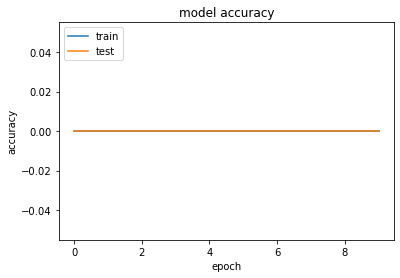

In [44]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
